<a href="https://colab.research.google.com/github/JangAyeon/TIL/blob/main/6_1_using_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

'2.6.0'

# 6-1-1 : 단어와 문자의 원-핫 인코딩

In [3]:
import numpy as np
import string
from keras.preprocessing.text import Tokenizer

**단어 수준의 원-핫 인코딩**

In [37]:

samples=["The cat sat on the mat.", "The dog ate my homework."]
#초기 데이터 : 각 원소가 sample
#이 예시에서는 하나의 샘플 = 하나의 문장, 그러나 문서 전체도 샘플로 사용 가능

token_index={} #데이터에 있는 모든 토큰의 인덱스 구축

for sample in samples:
  for word in sample.split(): 
    #split()을 사용해 sample을 토큰으로 나눔 (실전에서는 구둣점과 특수문자로 split 진행)
    if word not in token_index:
      #단어마다 고유한 인덱스 할당
      token_index[word]=len(token_index)+1
      #인덱스는 0 사용하지 X

max_length=10
#sample을 벡터로 변환
#각 sample에서 max_length까지 단어만 사용

result=np.zeros((len(samples),max_length,max(token_index.values())+1))
#결과 저장할 배열
for i,sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index=token_index.get(word)
    result[i,j,index]=1.

**문자 수준 원-핫 인코딩**

In [38]:
samples=["The cat sat on the mat.", "The dog ate my homework."]
characters=string.printable #출력 가능한 모든 아스키 문자
token_index=dict(zip(characters, range(1,len(characters)+1)))

max_length=50
results=np.zeros((len(samples),max_length,max(token_index.values())+1))
for i,sample in enumerate(samples):
  for j,character in enumerate(sample[:max_length]):
    index=token_index.get(character)
    results[i,j,index]=1.

**케라스를 사용한 단어 수준의 원-핫 인코딩**

In [39]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer=Tokenizer(num_words=1000)
#가장 빈도가 높은 1000개의 단어 선택하는 Tokenizer 객체 생성

tokenizer.fit_on_texts(samples)
#단어 인덱스 구축

sequences=tokenizer.texts_to_sequences(samples)
#문자열을 정수 인덱스의 리스트로 변환

one_hot_results=tokenizer.texts_to_matrix(samples,mode="binary")
#직접 원-핫 이진 벡터 표현 얻음 (이 외 다른 벡터화 방법 제공)

word_index=tokenizer.word_index
#계산된 단어 인덱스

print("Found %s unique tokens." %len(word_index))

Found 9 unique tokens.


**해싱 기법을 사용한 단어 수준의 원-핫 인코딩**

In [40]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality=1000
#단어를 크기 1000인 벡터로 저장 (그 이상의 단어 존재시, 해싱 충돌 발생 & 인코딩 정확도 감소)
max_length=10

results=np.zeros((len(samples),max_length,dimensionality))
for i, sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    #단어를 해싱하여 0과 1000 사이의 랜덤한 정수 인덱스로 변환
    index=abs(hash(word))%dimensionality
    results[i,j,index]=1.

# 6-1-2 : 단어 임베딩 사용

**Embedding 층을 사용해 단어 임베딩 학습**

In [8]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [41]:
max_features=10000 #특성으로 사용할 단어 수
maxlen=20 # 사용할 텍스트 길이 (가장 빈번한 max_features개의 단어만 사용)

(x_train, y_train), (x_test,y_test)=imdb.load_data(num_words=max_features)
#정수 리스트로 데이터 로드

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
#리스트를 (samples,maxlen) 크기의 2D 정수 텐서로 변환

In [42]:
model=Sequential()

model.add(Embedding(10000,8,input_length=maxlen))
#임베딩된 입력을 Flatten층에서 펼치기 위해 Embedding 층에서 input_length 지정
#Embedding 층의 출력 크기 (samples, maxlen, 8)

model.add(Flatten())
#3D 임베딩 텐설르 (samples,maxlen*8)의 2D 텐서로 펼쳐짐

model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()
#분류기 추가


history=model.fit(x_train,y_train,
                  epochs=10, batch_size=32,
                  validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6739 - accuracy: 0.6077 - val_loss: 0.6263 - val_accuracy: 0.6996
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7500 - val_loss: 0.5265 - val_accuracy: 0.7318
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7

**사전 훈련된 단어 임베딩 사용**

# 6-1-3 : 모든 내용 적용 <원본 텍스트에서 단어 임베딩까지>

In [11]:
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np


from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

import matplotlib.pyplot as plt

**원본 IMDB 텍스트 다운로드하기**

In [17]:
!wget http://s3.amazonaws.com/text-datasets/aclImdb.zip

--2021-09-23 07:54:48--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.184.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.184.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M  24.0MB/s    in 2.4s    

2021-09-23 07:54:51 (24.0 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



In [18]:
!unzip -qq /content/aclImdb.zip

In [43]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name) :
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else :
                labels.append(1)

**데이터 토큰화**

In [47]:
maxlen=100 # 100개 단어 이후는 버림
training_samples = 200 # 훈련 샘플은 200ro
validation_samples = 10000 # 검증샘플
max_words = 10000 # 가장 빈도 높은 10000개 단어만

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data=pad_sequences(sequences,maxlen=maxlen)

labels=np.asarray(labels)
print("데이터 텐서의 크기 : ",data.shape)
print("레이블 텐서의 크기 : ",labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training_samples]
y_train = labels[:training_samples]

x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 크기 :  (25000,)


In [48]:
x_train.shape

(200, 100)

In [49]:
y_train.shape

(200,)

In [50]:
x_val.shape

(10000, 100)

In [51]:
y_val.shape

(10000,)

**GloVe 단어 임베딩 내려받기**

In [21]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d datasets

--2021-09-23 07:56:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-23 07:56:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-23 07:56:04--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

**임베딩 전처리**

In [52]:
glove_dir = '/content/datasets'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),
        encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("%s개의 단어 벡터를 찾았습니다." %len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [53]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items() :
    embedding_vector = embeddings_index.get(word)
    if i<max_words :
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [56]:
embedding_matrix.shape

(10000, 100)

**모델 정의하기**

In [58]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim,
                   input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


**모델에 Glove 임베딩 로드하기**

In [59]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

**모델 훈련과 평가**

In [60]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc']) 
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val)) 
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 122ms/step - loss: 2.4141 - acc: 0.5350 - val_loss: 1.1142 - val_acc: 0.5073
Epoch 2/10
7/7 [==============================] - 1s 101ms/step - loss: 0.6617 - acc: 0.6450 - val_loss: 1.5099 - val_acc: 0.4932
Epoch 3/10
7/7 [==============================] - 1s 113ms/step - loss: 0.4949 - acc: 0.7250 - val_loss: 0.9211 - val_acc: 0.4929
Epoch 4/10
7/7 [==============================] - 1s 112ms/step - loss: 0.2020 - acc: 0.9200 - val_loss: 1.2613 - val_acc: 0.4937
Epoch 5/10
7/7 [==============================] - 1s 97ms/step - loss: 0.1495 - acc: 0.9800 - val_loss: 0.7918 - val_acc: 0.5017
Epoch 6/10
7/7 [==============================] - 1s 112ms/step - loss: 0.0836 - acc: 0.9950 - val_loss: 2.5464 - val_acc: 0.4931
Epoch 7/10
7/7 [==============================] - 1s 98ms/step - loss: 0.4424 - acc: 0.7800 - val_loss: 0.8801 - val_acc: 0.4968
Epoch 8/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0559 - acc: 0.9950

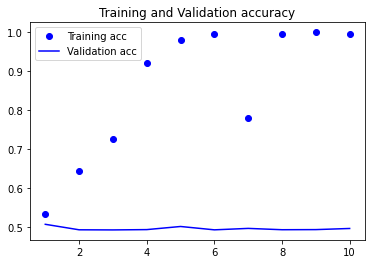

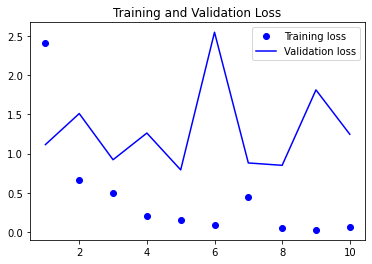

In [63]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs, val_acc,"b",label="Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [64]:
model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 3s 266ms/step - loss: 0.6896 - acc: 0.5550 - val_loss: 0.6952 - val_acc: 0.4959
Epoch 2/10
7/7 [==============================] - 1s 231ms/step - loss: 0.5078 - acc: 0.9800 - val_loss: 0.7166 - val_acc: 0.4958
Epoch 3/10
7/7 [==============================] - 1s 229ms/step - loss: 0.2894 - acc: 0.9850 - val_loss: 0.7214 - val_acc: 0.4973
Epoch 4/10
7/7 [==============================] - 1s 243ms/step - loss: 0.1320 - acc: 1.0000 - val_loss: 0.7267 - val_acc: 0.4988
Epoch 5/10
7/7 [==============================] - 1s 118ms/step - loss: 0.0655 - acc: 1.0000 - val_loss: 0.7401 - val_acc: 0.4982
Epoch 6/10
7/7 [==============================] - 1s 103ms/step - loss: 0.0322 - acc: 1.0000 - val_loss: 0.7619 - val_acc: 0.4989
Epoch 7/10
7/7 [==============================] - 1s 104ms/step - loss: 0.0181 - acc: 1.0000 - val_loss: 0.7705 - val_acc: 0.4994
Epoch 8/10
7/7 [==============================] - 1s 119ms/step - loss: 0.0104 - acc: 1.00

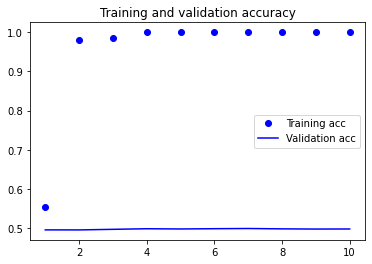

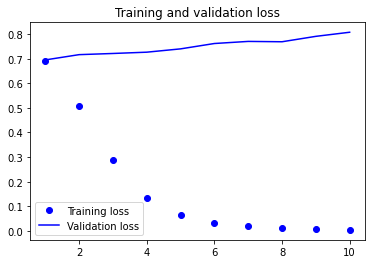

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
training_samples=2000
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

In [69]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(2000, 100) (2000,)
(10000, 100) (10000,)


In [70]:
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(x_val,y_val))

Epoch 1/10
63/63 [==============================] - 2s 38ms/step - loss: 0.6657 - acc: 0.5680 - val_loss: 0.8481 - val_acc: 0.4999
Epoch 2/10
63/63 [==============================] - 2s 30ms/step - loss: 0.2371 - acc: 0.9800 - val_loss: 0.8225 - val_acc: 0.4949
Epoch 3/10
63/63 [==============================] - 2s 37ms/step - loss: 0.0369 - acc: 0.9995 - val_loss: 0.9706 - val_acc: 0.4929
Epoch 4/10
63/63 [==============================] - 2s 38ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.1322 - val_acc: 0.4950
Epoch 5/10
63/63 [==============================] - 2s 30ms/step - loss: 3.2757e-04 - acc: 1.0000 - val_loss: 1.3082 - val_acc: 0.4924
Epoch 6/10
63/63 [==============================] - 1s 20ms/step - loss: 3.4886e-05 - acc: 1.0000 - val_loss: 1.4354 - val_acc: 0.4945
Epoch 7/10
63/63 [==============================] - 1s 22ms/step - loss: 4.4980e-06 - acc: 1.0000 - val_loss: 1.5666 - val_acc: 0.4926
Epoch 8/10
63/63 [==============================] - 1s 21ms/step - loss

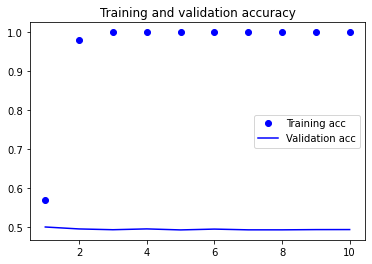

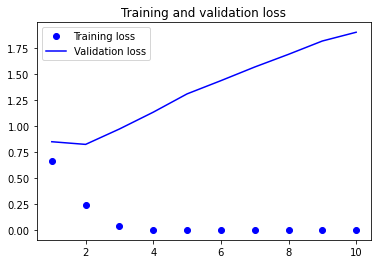

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
test_dir=os.path.join(imdb_dir,"test")
labels=[]
texts=[]

for label_type in ["neg","pos"]:
  dir_name=os.path.join(test_dir,label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:]==".txt":
      f=open(os.path.join(dir_name,fname),encoding="utf8")
      texts.append(f.read())
      f.close()
      if label_type=="neg":
        labels.append(0)
      else:
        labels.append(1)


sequences=tokenizer.texts_to_sequences(texts)
x_test=pad_sequences(sequences,maxlen=maxlen)
y_test=np.asarray(labels)

In [73]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.2206 - acc: 0.5000


[1.220556616783142, 0.5000399947166443]